In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 13:02:17 2018

@author: macchini
"""

import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import my_plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import utils

from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal

folder = '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Personalized_Mapping/DATA/Survey'

files = os.listdir(folder)

csv = [x for x in files if '.csv' in x][0]


In [2]:
answers_df = pd.read_csv(os.path.join(folder, csv))
answers_df

,Informazioni cronologiche,Age,Gender,Do you have experience in piloting drones?,"If yes, how many hours?",Do you practice any sport?,"If yes, which one?","If yes, how many hours per week?",Do you play video games?,"If yes, how many hours per week?.1",...,The robot was responding to my commands,I learned how to teleoperate the robot with time,My performance increased with time,I felt sick,I felt like I was actually flying in the sky,I enjoyed the experiment,Do you have any final remarks?,Teleoperation hardware,Teleoperation type,The experiment made me tired
0,14/11/2018 11.34.13,22,Male,No,NaN,Yes,"Hiking, swimming, skiing",<2,Yes,<2,...,4,4,4,2,3,5,I think that with time I was able to achieve a...,Remote,Simple,2
1,14/11/2018 15.31.01,23,Male,Yes,10<100,No,NaN,<2,Yes,>4,...,5,4,4,3,2,4,VR is cool,Remote,Simple,4
2,14/11/2018 16.29.29,24,Male,No,NaN,No,NaN,NaN,No,NaN,...,4,4,5,5,3,4,NaN,Remote,Simple,3
3,14/11/2018 16.57.07,22,Male,No,NaN,Yes,"ski, mountain bike",>4,No,NaN,...,5,4,4,2,4,5,NaN,Remote,Simple,1
4,15/11/2018 11.35.53,22,Male,Yes,<10,Yes,":ountainbike, swimming, volleyball",>4,No,NaN,...,4,5,5,3,2,4,NaN,Remote,Simple,1
5,15/11/2018 14.45.13,25,Male,Yes,10<100,Yes,"volley ball, football",2<4,No,NaN,...,4,5,3,5,4,4,the fourth and last simulation was lagging. I ...,Motive,Simple,4
6,15/11/2018 15.47.50,23,Male,Yes,<10,Yes,"Running, swimming, tennis",2<4,No,NaN,...,3,5,5,3,2,4,It took a bit of time to understand how to pil...,Motive,Simple,3
7,15/11/2018 17.08.23,22,Male,Yes,>100,Yes,"Badminton, Ski, Surfing, Dancing",2<4,Yes,<2,...,4,5,5,1,3,5,"Minor lag spikes, going upwards was capped, i ...",Motive,Simple,1
8,15/11/2018 17.36.05,24,Male,Yes,10<100,Yes,"Sailing, Hicking",2<4,No,NaN,...,5,5,5,3,2,5,NaN,Motive,Simple,2
9,16/11/2018 11.36.43,23,Male,Yes,10<100,Yes,"Fittnes, airsoft",<2,Yes,2<4,...,3,5,4,1,3,5,The yaw gain was pretty high. strange at first...,Motive,Simple,2


In [3]:

types = ['remote', 'simple', 'minmax', 'new']
named = ['Remote', 'Simple', 'Min-Max', 'Personalized']

hw = 'Teleoperation hardware'
mapping = 'Teleoperation type'

answers = {}

t = answers_df[answers_df['Teleoperation hardware'] == 'Remote']
answers['remote'] = t[t['Teleoperation type'] == 'Simple']
motive = answers_df[answers_df['Teleoperation hardware'] == 'Motive']
answers['simple'] = motive[motive['Teleoperation type'] == 'Simple']
answers['minmax'] = motive[motive['Teleoperation type'] == 'Min-Max']
answers['new'] = motive[motive['Teleoperation type'] == 'Personalized']

In [4]:
data = {}

tired = 'The experiment made me tired'
respond = 'The robot was responding to my commands'
learned = 'I learned how to teleoperate the robot with time'
performance_rise = 'My performance increased with time'
sick = 'I felt sick'
fly = 'I felt like I was actually flying in the sky'
fun = 'I enjoyed the experiment'

for i in types:
    data[i] = {}
    data[i][tired] = answers[i][tired].values
    data[i][respond] = answers[i][respond].values
    data[i][learned] = answers[i][learned].values
    data[i][performance_rise] = answers[i][performance_rise].values
    data[i][sick] = answers[i][sick].values
    data[i][fly] = answers[i][fly].values
    data[i][fun] = answers[i][fun].values
    
for i in types:
    print(data[i][tired].size)

7
6
6
9


In [49]:
### Parameters
    
c0 = np.array([0,0,0])/256
c1 = np.array([150,0,0])/256
c2 = np.array([0,0,100])/256
c3 = np.array([0,100,0])/256

c = [c0, c1, c2, c3]


lw = 3

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [9, 6],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
    'lines.linewidth' : lw,
    'patch.linewidth' : lw,
    'text.usetex' : True,
    'font.family' : 'serif',

   }
mpl.rcParams.update(params)
labels = ['remote', 'non-personalized', 'proposed (linear)', 'proposed (nonlinear)' ]

def plot_bars(data, names, col = 'b', leg = False, ax = None, save = False, where = None, y = ''):

    if ax is None:
        plt.figure()
        ax = plt.subplot(1, 1, 1)    
    
    l = 0.1
    
    ax.bar([1],  np.mean(data[names[0]]), l, facecolor = [1, 1, 1], ecolor = col[0], edgecolor = col[0],  yerr = np.std(data[names[0]]))
    ax.bar([1.4],  np.mean(data[names[1]]), l, facecolor = [1, 1, 1], ecolor = col[1], edgecolor = col[1],  yerr = np.std(data[names[1]]))
    ax.bar([1.8],  np.mean(data[names[2]]), l, facecolor = [1, 1, 1], ecolor = col[2], edgecolor = col[2],  yerr = np.std(data[names[2]]))
    ax.bar([2.2],  np.mean(data[names[3]]), l, facecolor = [1, 1, 1], ecolor = col[3], edgecolor = col[3],  yerr = np.std(data[names[3]]))
    
    plt.xlim([0.8, 2.3])
    plt.ylim([0, 6])
    plt.yticks([0, 1, 2, 3, 4, 5])
    plt.xticks([])
    plt.grid()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.ylabel(y)

    for idx,i in enumerate(labels):
        ax.scatter(0,0, color = c[idx], label = i)
        
    if leg:
        plt.legend()

    if save:
        savefig(where, bbox_inches='tight')

In [50]:
def t_test_kruskal(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = kruskal(X, Y)
    
    return [stat, p]

remote
av = 2.0
std = 1.0690449676496976

simple
av = 2.1666666666666665
std = 1.0671873729054748

minmax
av = 2.0
std = 0.816496580927726

new
av = 1.3333333333333333
std = 0.6666666666666666

{'remote_simple': 0.7648126695153893, 'remote_minmax': 0.8807361570460169, 'remote_new': 0.1598416400249865, 'simple_minmax': 0.8671327534472897, 'simple_new': 0.09463300902853868, 'minmax_new': 0.1073644652066152}


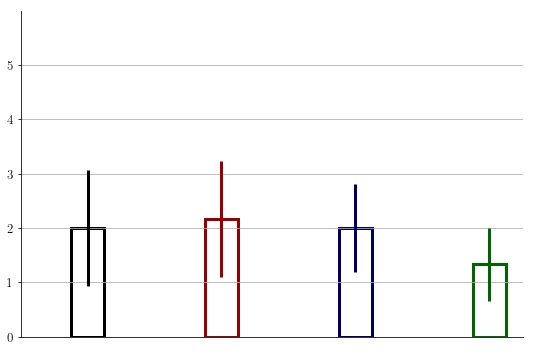

In [51]:
var = tired

data[var] = {}

for i in types:
    print(i)
    print('av = ' + str(np.mean(data[i][var])))
    print('std = ' + str(np.std(data[i][var])))
    print()
    
    data[var][i] = data[i][var]
            
p = {}  
p_krus = {}  
p_var = {}   

for idx,i in enumerate(types):
    for j in types[idx+1:]:
        if i != j:
            idx = i + '_' + j
            
            _, p_krus[idx] = t_test_kruskal(data[i][var], data[j][var])
#             p_var[idx] = f_test(data[i][var], data[j][var])


print(p_krus)

plot_bars(data[var], types, col = c)

remote
av = 4.142857142857143
std = 0.6388765649999398

simple
av = 4.0
std = 0.816496580927726

minmax
av = 4.666666666666667
std = 0.4714045207910317

new
av = 4.444444444444445
std = 0.6849348892187751

{'remote_simple': 0.7587416620560522, 'remote_minmax': 0.15254179354519565, 'remote_new': 0.35373916162731034, 'simple_minmax': 0.16198944245067365, 'simple_new': 0.30851158133871925, 'minmax_new': 0.5862136810731344}


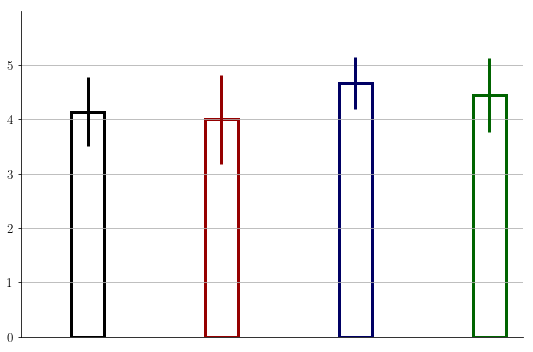

In [52]:
var = respond

data[var] = {}

for i in types:
    print(i)
    print('av = ' + str(np.mean(data[i][var])))
    print('std = ' + str(np.std(data[i][var])))
    print()
    
    data[var][i] = data[i][var]
            
p = {}  
p_krus = {}  
p_var = {}   

for idx,i in enumerate(types):
    for j in types[idx+1:]:
        if i != j:
            idx = i + '_' + j
            
            _, p_krus[idx] = t_test_kruskal(data[i][var], data[j][var])
#             p_var[idx] = f_test(data[i][var], data[j][var])


print(p_krus)

plot_bars(data[var], types, col = c)

remote
av = 4.142857142857143
std = 0.6388765649999399

simple
av = 5.0
std = 0.0

minmax
av = 4.333333333333333
std = 0.7453559924999298

new
av = 4.555555555555555
std = 0.6849348892187751

{'remote_simple': 0.01284396210886525, 'remote_minmax': 0.5867461457276779, 'remote_new': 0.19946893473409502, 'simple_minmax': 0.05777957112359726, 'simple_new': 0.128735048957948, 'minmax_new': 0.5445712640780265}


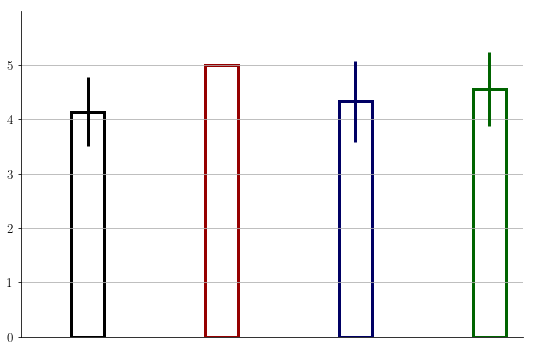

In [53]:
var = learned

data[var] = {}

for i in types:
    print(i)
    print('av = ' + str(np.mean(data[i][var])))
    print('std = ' + str(np.std(data[i][var])))
    print()
    
    data[var][i] = data[i][var]
            
p = {}  
p_krus = {}  
p_var = {}   

for idx,i in enumerate(types):
    for j in types[idx+1:]:
        if i != j:
            idx = i + '_' + j
            
            _, p_krus[idx] = t_test_kruskal(data[i][var], data[j][var])
#             p_var[idx] = f_test(data[i][var], data[j][var])


print(p_krus)

plot_bars(data[var], types, col = c)

remote
av = 4.142857142857143
std = 0.989743318610787

simple
av = 4.5
std = 0.7637626158259734

minmax
av = 4.666666666666667
std = 0.7453559924999298

new
av = 4.555555555555555
std = 0.6849348892187751

{'remote_simple': 0.4774012793553657, 'remote_minmax': 0.2185335135430134, 'remote_new': 0.37299848361348653, 'simple_minmax': 0.5981614526835215, 'simple_new': 0.9437082478853287, 'minmax_new': 0.5954671236050979}


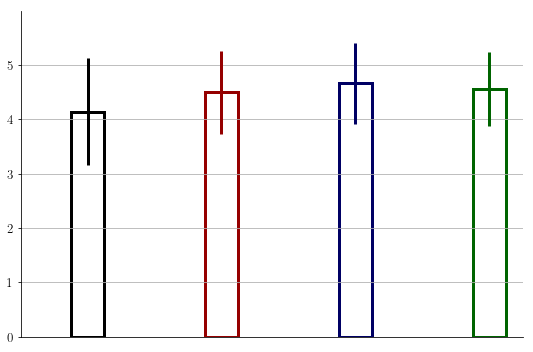

In [54]:
var = performance_rise

data[var] = {}

for i in types:
    print(i)
    print('av = ' + str(np.mean(data[i][var])))
    print('std = ' + str(np.std(data[i][var])))
    print()
    
    data[var][i] = data[i][var]
            
p = {}  
p_krus = {}  
p_var = {}   

for idx,i in enumerate(types):
    for j in types[idx+1:]:
        if i != j:
            idx = i + '_' + j
            
            _, p_krus[idx] = t_test_kruskal(data[i][var], data[j][var])
#             p_var[idx] = f_test(data[i][var], data[j][var])


print(p_krus)

plot_bars(data[var], types, col = c)

remote
av = 2.857142857142857
std = 0.9897433186107869

simple
av = 2.3333333333333335
std = 1.49071198499986

minmax
av = 1.8333333333333333
std = 1.21335164821342

new
av = 1.6666666666666667
std = 1.247219128924647

{'remote_simple': 0.4127766913840204, 'remote_minmax': 0.12065300996606049, 'remote_new': 0.01473589391680085, 'simple_minmax': 0.5889191420342784, 'simple_new': 0.38585307316614015, 'minmax_new': 0.8882641013349601}


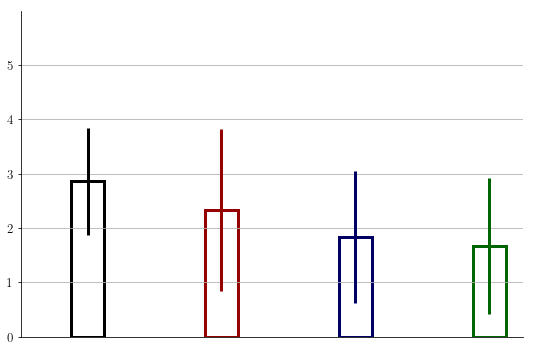

In [55]:
var = sick

data[var] = {}

for i in types:
    print(i)
    print('av = ' + str(np.mean(data[i][var])))
    print('std = ' + str(np.std(data[i][var])))
    print()
    
    data[var][i] = data[i][var]
            
p = {}  
p_krus = {}  
p_var = {}   

for idx,i in enumerate(types):
    for j in types[idx+1:]:
        if i != j:
            idx = i + '_' + j
            
            _, p_krus[idx] = t_test_kruskal(data[i][var], data[j][var])
#             p_var[idx] = f_test(data[i][var], data[j][var])


print(p_krus)

plot_bars(data[var], types, col = c)

remote
av = 3.0
std = 0.7559289460184544

simple
av = 3.0
std = 0.816496580927726

minmax
av = 3.6666666666666665
std = 0.9428090415820634

new
av = 3.6666666666666665
std = 0.816496580927726

{'remote_simple': 1.0, 'remote_minmax': 0.20220074225735038, 'remote_new': 0.17048547030845468, 'simple_minmax': 0.23793873575222502, 'simple_new': 0.20863842386798168, 'minmax_new': 0.8517421232387837}


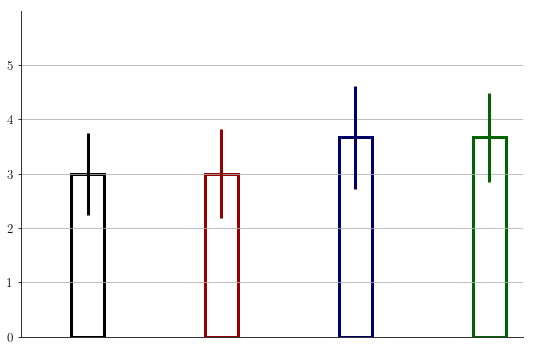

In [56]:
var = fly

data[var] = {}

for i in types:
    print(i)
    print('av = ' + str(np.mean(data[i][var])))
    print('std = ' + str(np.std(data[i][var])))
    print()
    
    data[var][i] = data[i][var]
            
p = {}  
p_krus = {}  
p_var = {}   

for idx,i in enumerate(types):
    for j in types[idx+1:]:
        if i != j:
            idx = i + '_' + j
            
            _, p_krus[idx] = t_test_kruskal(data[i][var], data[j][var])
#             p_var[idx] = f_test(data[i][var], data[j][var])


print(p_krus)

plot_bars(data[var], types, col = c)

remote
av = 4.428571428571429
std = 0.4948716593053935

simple
av = 4.666666666666667
std = 0.4714045207910317

minmax
av = 4.833333333333333
std = 0.37267799624996495

new
av = 4.666666666666667
std = 0.4714045207910317

{'remote_simple': 0.40949304017811616, 'remote_minmax': 0.15078556502796645, 'remote_new': 0.3564561327438993, 'simple_minmax': 0.5232883447117375, 'simple_new': 1.0, 'minmax_new': 0.4896602630171413}


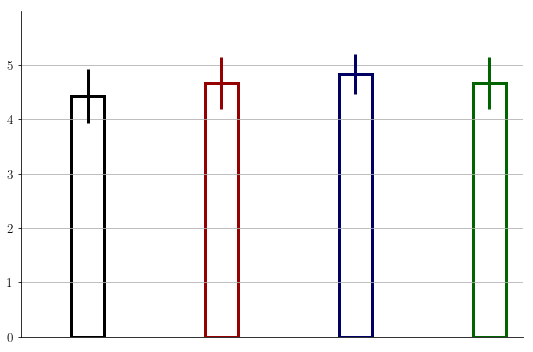

In [57]:
var = fun

data[var] = {}

for i in types:
    print(i)
    print('av = ' + str(np.mean(data[i][var])))
    print('std = ' + str(np.std(data[i][var])))
    print()
    
    data[var][i] = data[i][var]
            
p = {}  
p_krus = {}  
p_var = {}   

for idx,i in enumerate(types):
    for j in types[idx+1:]:
        if i != j:
            idx = i + '_' + j
            
            _, p_krus[idx] = t_test_kruskal(data[i][var], data[j][var])
#             p_var[idx] = f_test(data[i][var], data[j][var])


print(p_krus)

plot_bars(data[var], types, col = c)

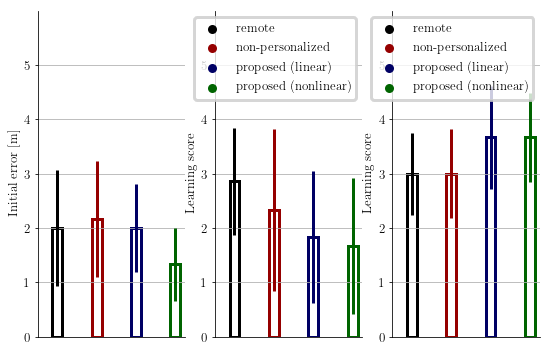

In [58]:

# paper figure

save_param = False

plt.figure()
ax = plt.subplot(1, 3, 1)   
plot_bars(data[tired], types, col = c, y = 'Initial error [m]', leg = False, ax = ax, save = save_param)
ax = plt.subplot(1, 3, 2)    
plot_bars(data[sick], types, col = c, y = 'Learning score', leg = True, ax = ax, save = save_param)
ax = plt.subplot(1, 3, 3)    
plot_bars(data[fly], types, col = c, y = 'Learning score', leg = True, ax = ax, save = save_param)